<a href="https://colab.research.google.com/github/ndtuan10/Image-Processing-And-Applications_CS406.M11.KHCL/blob/main/BaiTap/Image_Enhancement/BaiTap2%3A%20(Smooth%2C%20Sharpening%2C%20Laplacian%2C%20Median).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ngô Đức Tuấn**

MSSV: 18520186

##**Bài tập 2: Image Enhancement (tiếp theo): Smooth, Sharpening, Laplacian, Median**

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.exposure import rescale_intensity
path ='/content/drive/MyDrive/CS406.M11.KHCL/Baitap/Baitap2/images/'

In [ ]:
path_img1 = os.path.join(path,'RawData.jpg')
path_img2 = os.path.join(path,'circuit_noise.jpg')
path_img3 = os.path.join(path,'mandi.tif')
path_img4 = os.path.join(path,'moon.tif')
path_img5 = os.path.join(path,'bear_noise.jpg')

In [ ]:
# Hiển thị ảnh kết quả
def show(img, new_img, title1, title2):
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = plt.imshow(img, interpolation = 'bicubic')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    new_img = plt.imshow(new_img, interpolation = 'bicubic')

In [ ]:
# Hàm viết tính chập
def convolve(img, kernel):
  (iH, iW) = img.shape[:2]
  (kH, kW) = kernel.shape[:2]
  pad = (kW - 1) // 2
  image = cv2.copyMakeBorder(img, pad, pad, pad, pad, 
                            cv2.BORDER_REPLICATE)
  output = np.zeros((iH, iW), dtype='float32')
  for y in np.arange(pad, iH + pad):
	  for x in np.arange(pad, iW + pad):
		  roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
		  k = (roi * kernel).sum()
		  output[y - pad, x - pad] = k
  output = rescale_intensity(output, in_range=(0, 255))
  output = (output * 255).astype("uint8")
  return output

# **Yêu cầu 1: Smooth cho ảnh**

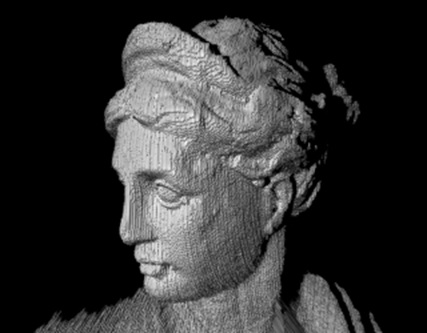

In [ ]:
# RawData img
img1 = cv2.imread(path_img1,0)
cv2_imshow(img1)

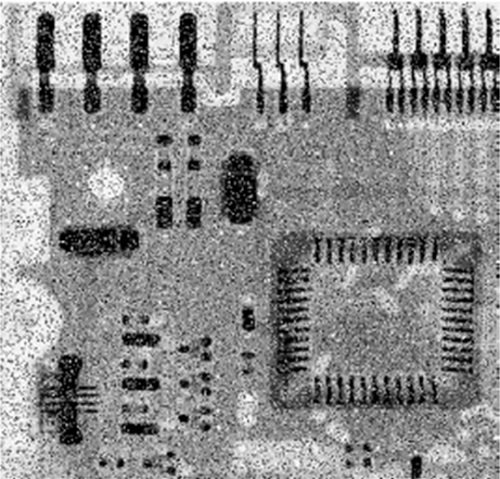

In [ ]:
# circuit_noise img
img2 = cv2.imread(path_img2, 0)
cv2_imshow(img2)

## **Dùng hàm viết tính chập**

In [ ]:
'''
1 vài kernel làm smooth ảnh
L1 = np.multiply((1/9), np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]))

L2 = np.multiply((1/10), np.array([[1, 1, 1],
                    [1, 2, 1],
                    [1, 1, 1]]))

L3 = np.multiply((1/16), np.array([[1, 2, 1],
                    [2, 4, 1],
                    [1, 2, 1]]))

L4 = np.multiply((1/5), np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]]))

L5 = np.multiply((1/8), np.array([[0, 1, 0],
                    [1, 4, 1],
                    [0, 1, 0]]))

L6 = np.multiply((1/32), np.array([[1, 3, 1],
                    [3, 16, 3],
                    [1, 3, 1]]))
'''
# Áp dụng cửa sổ lọc L2
smooth = np.multiply((1/10), np.array([[1, 1, 1],
                    [1, 2, 1],
                    [1, 1, 1]]))

In [ ]:
raw_img_convolve = convolve(img1, kernel=smooth)
circuit_img_convolve = convolve(img2, kernel=smooth)

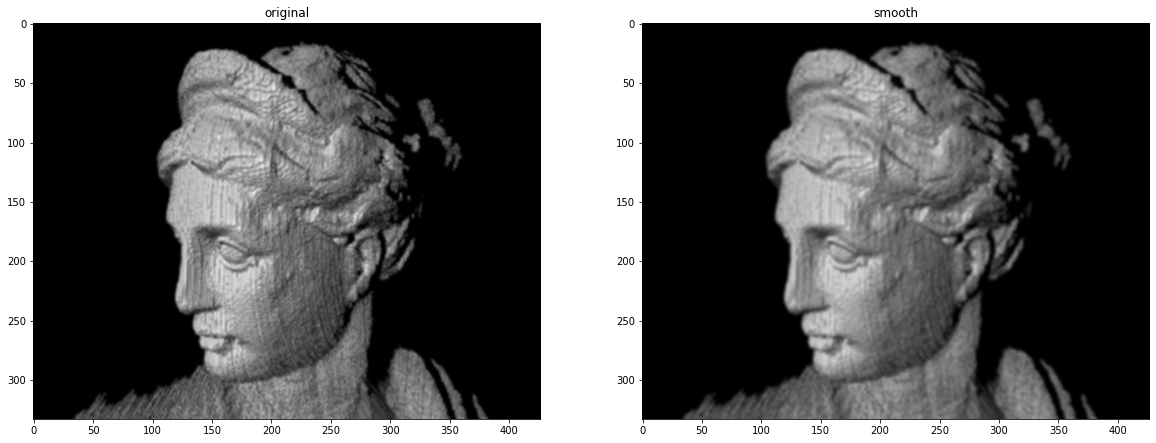

In [ ]:
show(img1, raw_img_convolve, "original", "smooth")

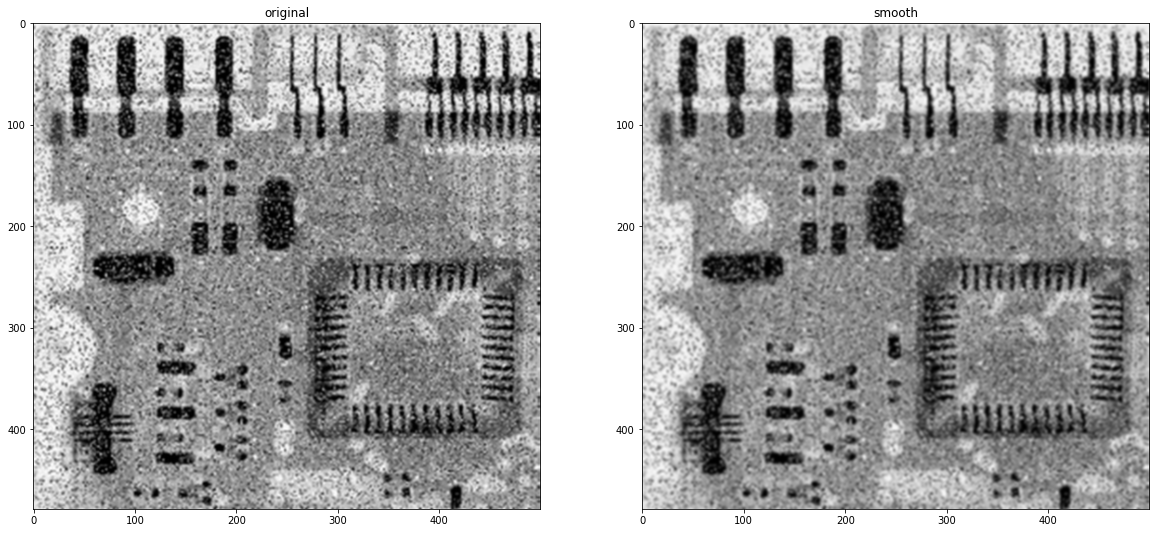

In [ ]:
show(img2, circuit_img_convolve, "original", "smooth")

## **Dùng filter2D**

In [ ]:
raw_img = cv2.filter2D(src=img1, ddepth=-1, kernel=smooth)

In [ ]:
circuit_img = cv2.filter2D(src=img2, ddepth=-1, kernel=smooth)

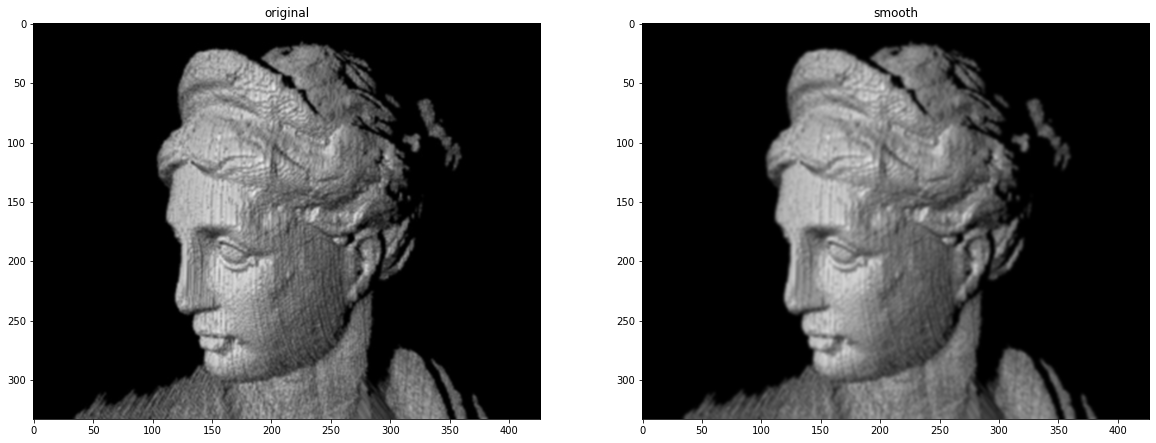

In [ ]:
show(img1, raw_img, "original", "smooth")

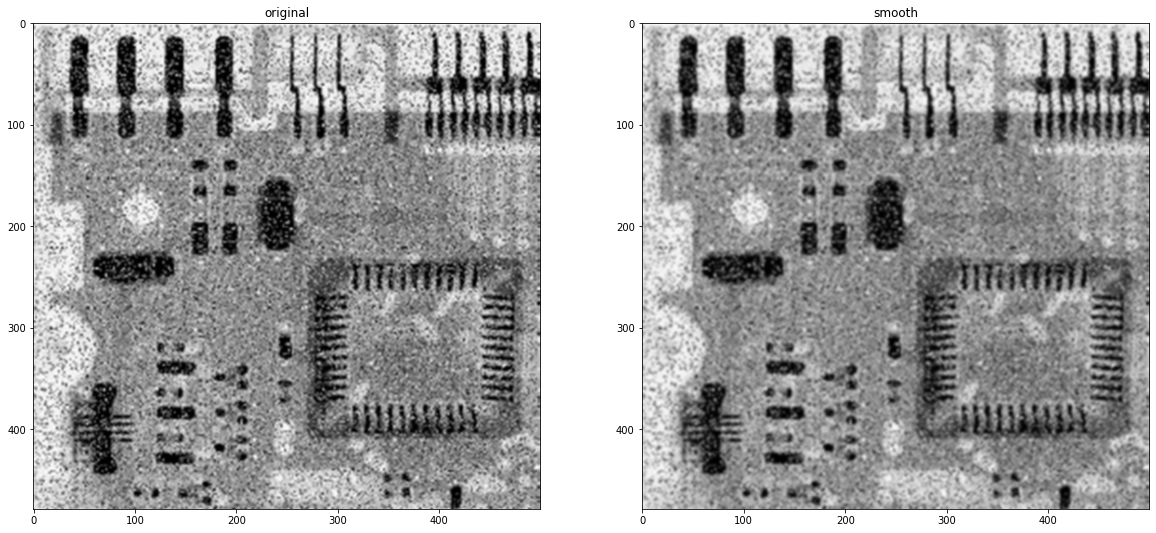

In [ ]:
show(img2, circuit_img, "original", "smooth")

# **Yêu cầu 2: Sharpenning cho ảnh**

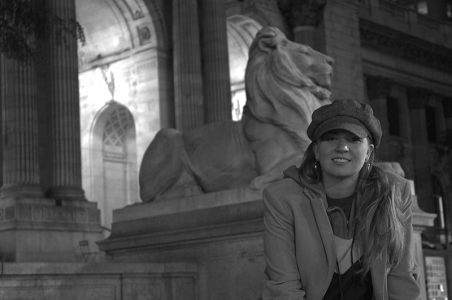

In [ ]:
# mandi img
img3 = cv2.imread(path_img3)
cv2_imshow(img3)

In [ ]:
'''
1 vài kernel làm sharpen ảnh
S1 = np.array([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]])

S2 = np.array([[-1, -1, -1],
              [-1, 9, -1],
              [-1, -1, -1]])

S3 = np.array([[1, -2, 1],
              [-2, 5, -2],
              [1, -2, 1]])
'''
sharpen = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [ ]:
mandi_img = cv2.filter2D(src=img3, ddepth=-1, kernel=sharpen)

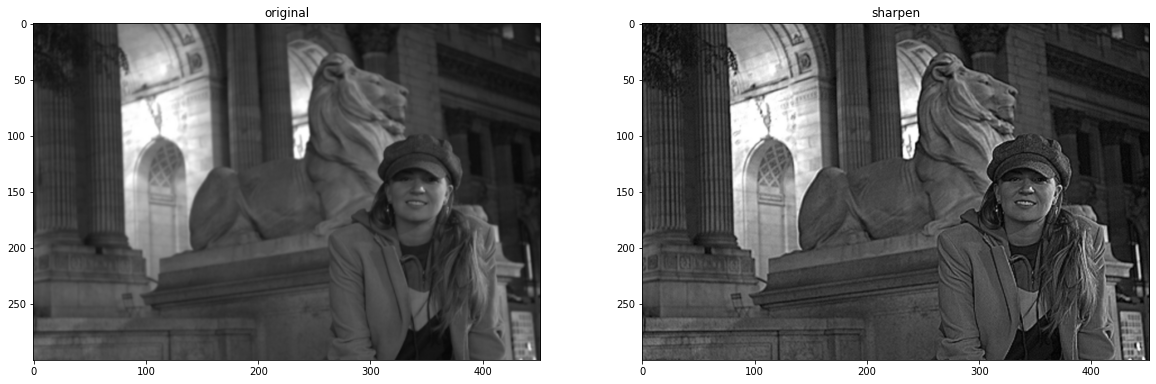

In [ ]:
show(img3, mandi_img, "original", "sharpen")

# **Yêu cầu 3: Sharpenning + Laplacian Filtered Image cho ảnh**

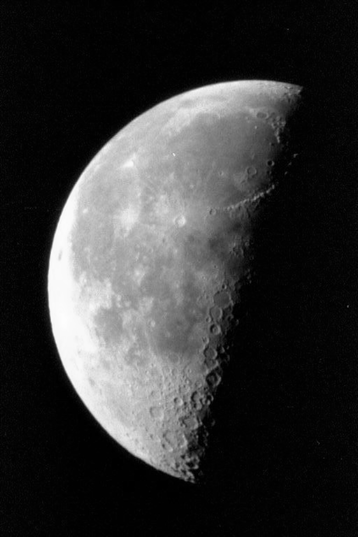

In [ ]:
# moon img
img4 = cv2.imread(path_img4)
cv2_imshow(img4)

## **Sharpening**

In [ ]:
moon_img_1 = cv2.filter2D(src=img4, ddepth=-1, kernel=sharpen)

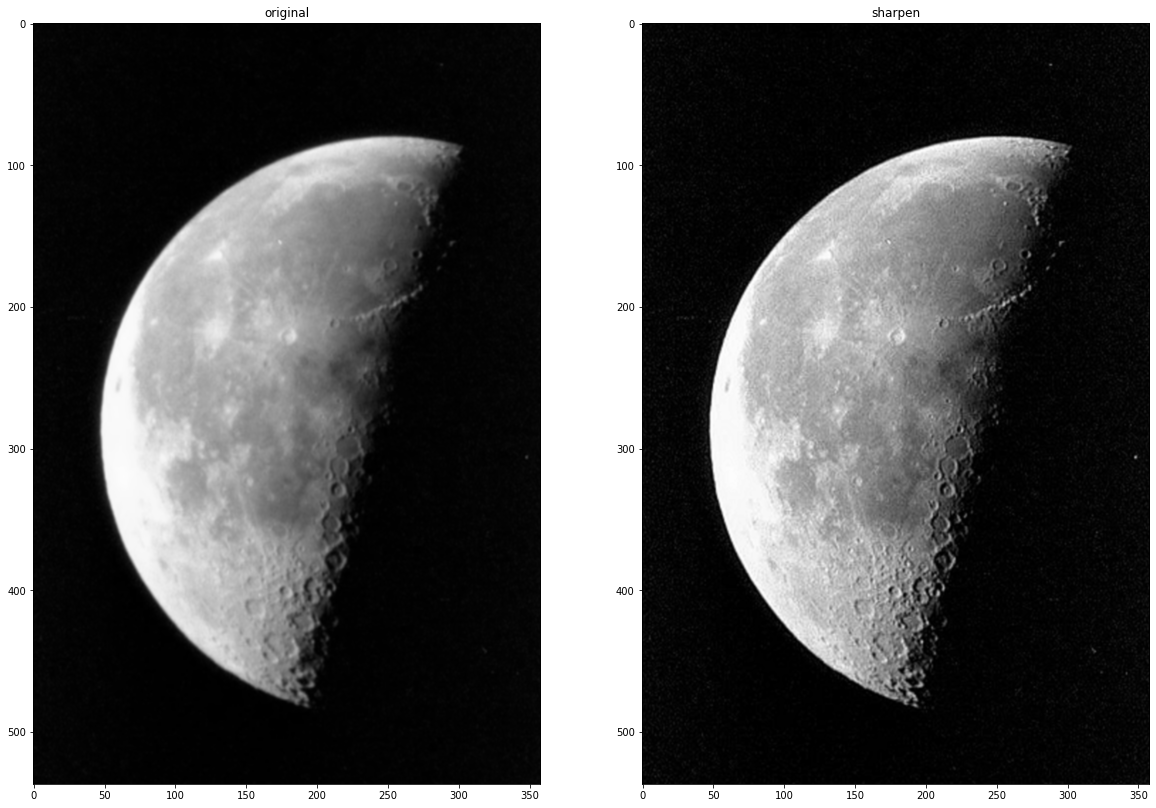

In [ ]:
show(img4, moon_img_1, "original", "sharpen")

## **Laplacian**

In [ ]:
# laplacian kernel
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]))

In [ ]:
moon_laplacian = cv2.filter2D(src=img4, ddepth=-1, kernel=laplacian)

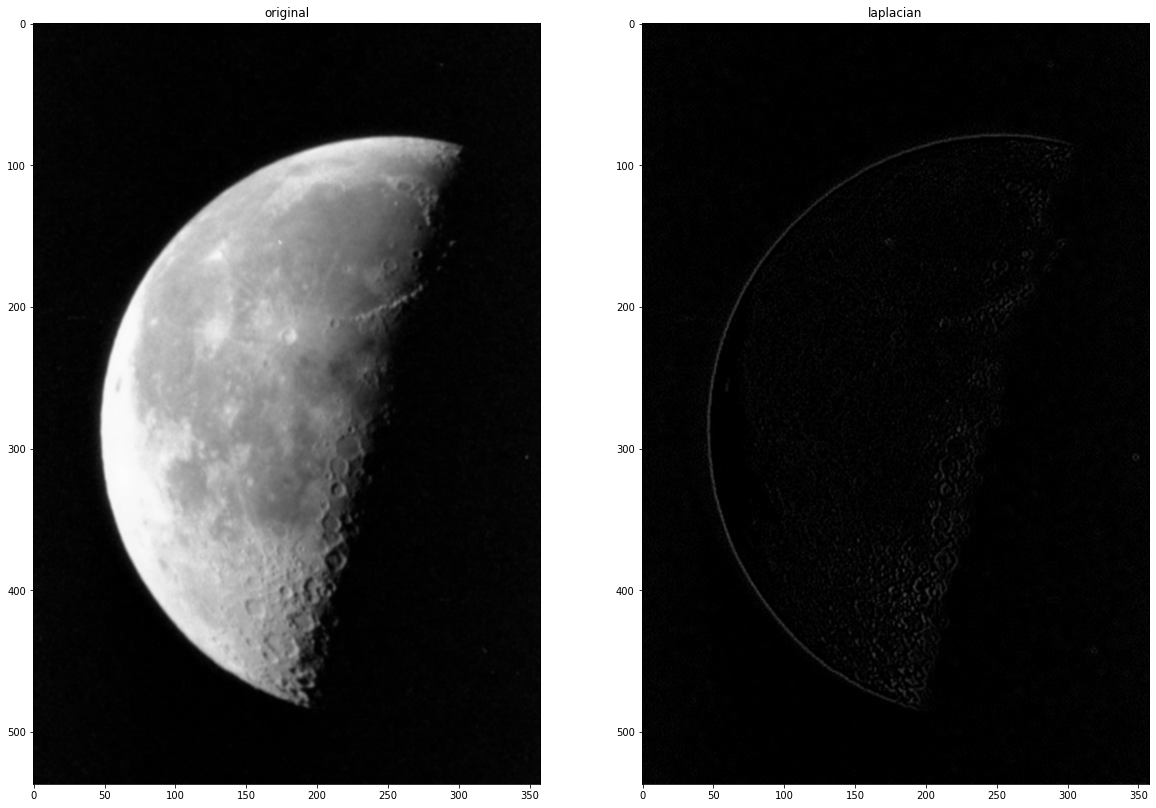

In [ ]:
show(img4, moon_laplacian, "original", "laplacian")

In [ ]:
def laplacian (f):
    new_img = cv2.Laplacian(f, -1)
    new_img2 = cv2.subtract(f, new_img)

    return new_img2

In [ ]:
moon_img_2 = laplacian(img4)

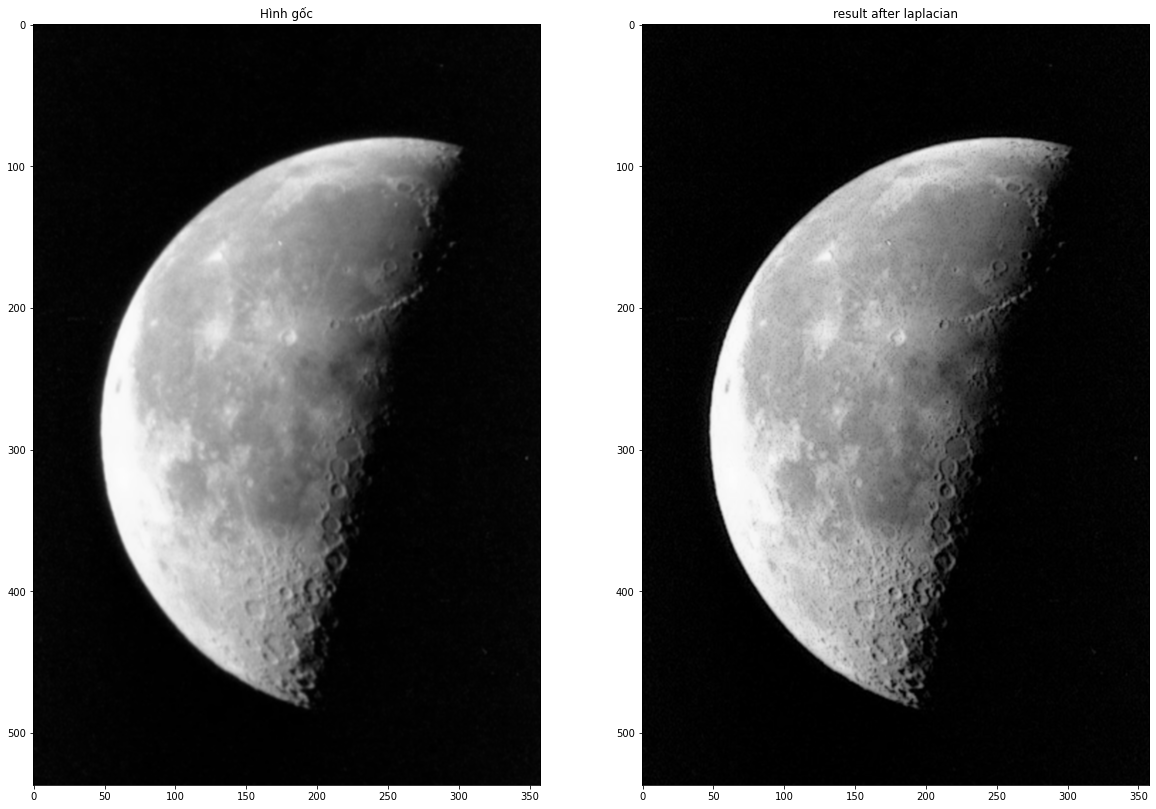

In [ ]:
show(img4, moon_img_2, "Hình gốc", "result after laplacian")

# **Yêu cầu 4: Median cho ảnh**

In [ ]:
def median (f):
    new_img = cv2.medianBlur(f, 5)

    return new_img

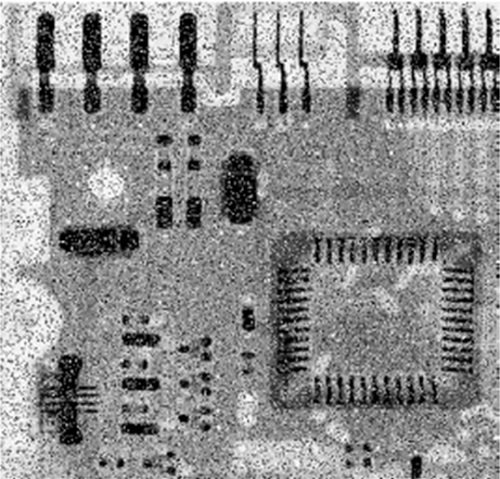

In [ ]:
cv2_imshow(img2) #circuit_noise img

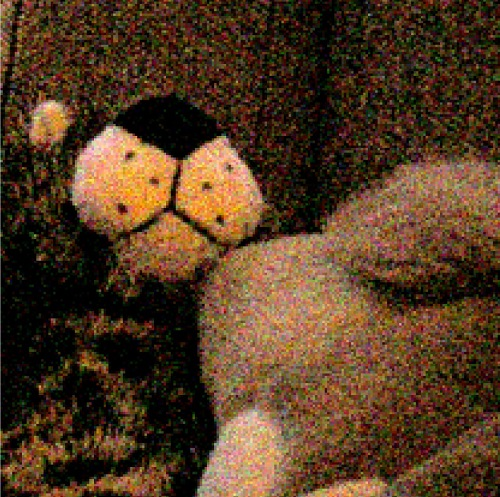

In [ ]:
# bear-noise img
img5 = cv2.imread(path_img5)
cv2_imshow(img5)

In [ ]:
median_img1 = median(img2) #circuit_noise.jpg
median_img2 = median(img5) #bear_noise.jpg

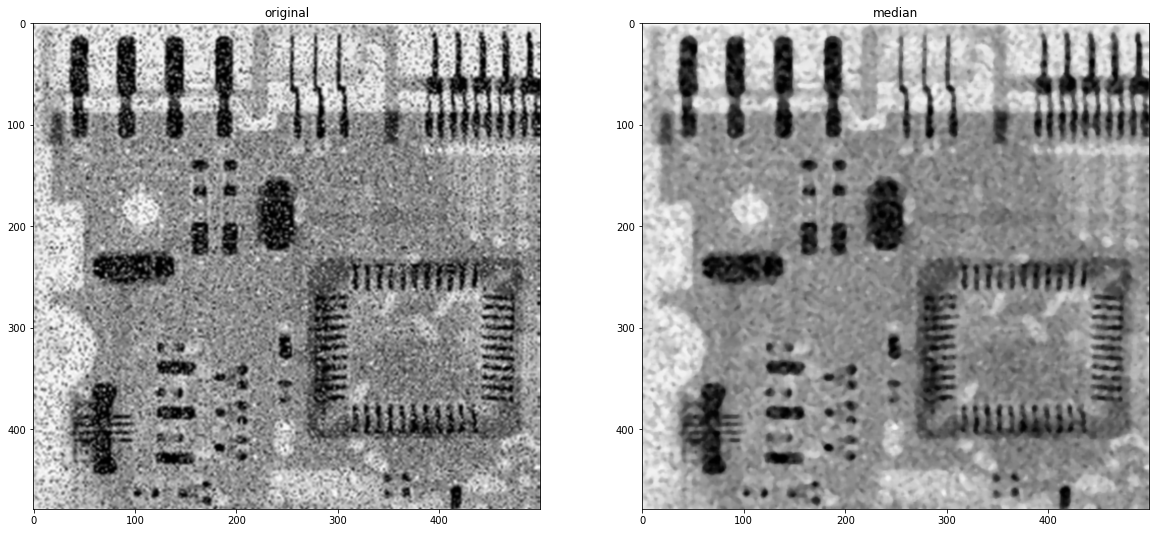

In [ ]:
show(img2, median_img1, "original", "median")

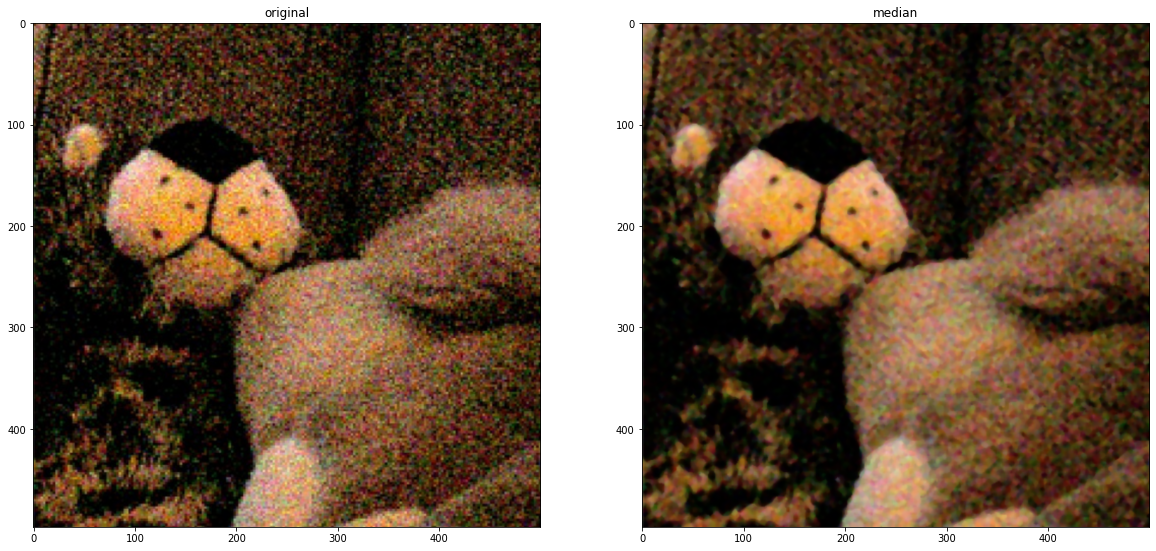

In [ ]:
show(img5, median_img2, "original", "median")